In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !pip install category_encoders

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import category_encoders as ce

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv("./dataset/train.csv.zip", compression="zip")

In [3]:
# Function to convert to hexavigesimal base
def az_to_int(az, nanVal=None):
    if az==az:  #catch NaN
        hv = 0
        for i in range(len(az)):
            hv += (ord(az[i].lower())-ord('a')+1)*26**(len(az)-1-i)
        return hv
    else:
        if nanVal is not None:
            return nanVal
        else:
            return az

In [4]:
df.v22 = df.v22.apply(az_to_int)
df.drop(columns='ID', inplace=True)

In [23]:
from pandas_profiling import ProfileReport

In [27]:
profile = ProfileReport(df, title='BNP paribas Claim Settlement', interactions=None, samples=None, correlations={
         "pearson": {"calculate": True},
         "spearman": {"calculate": False},
         "kendall": {"calculate": False},
         "phi_k": {"calculate": True},
         "cramers": {"calculate": False},
     })
profile.to_file("output.html")

In [6]:
models = ["Decision Trees", "LinearSVC", "KNNClassifier", "AdaBoost", "NeuralNet"]
time_taken = [7, 12, 11*60, 66, 99]
perf_df = pd.DataFrame({"models": models, "time_taken": time_taken})

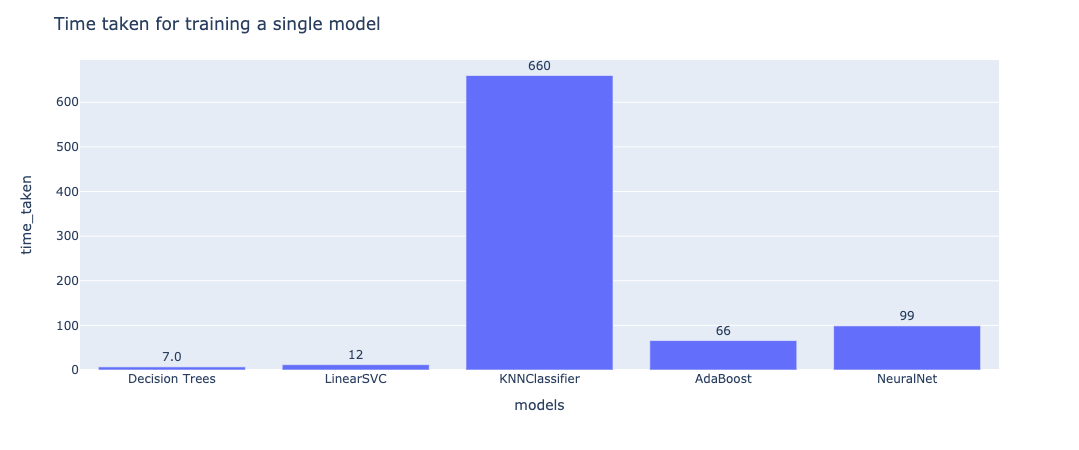

In [11]:
fig = px.bar(perf_df, x="models", y="time_taken", text="time_taken")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title="Time taken for training a single model")
fig.show()

In [9]:
""

''